In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:


# Baca dataset
data = pd.read_excel("produksiPadi.xlsx")

# Tampilkan data awal
print("Dataset awal:")
print(data.head())


Dataset awal:
   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [16]:
# Tambahkan kolom lag
data['Produksi_Padi_Lag1'] = data['Produksi Padi(Ton)'].shift(1)
data['Produksi_Padi_Lag2'] = data['Produksi Padi(Ton)'].shift(2)

# Hapus baris dengan nilai NaN akibat lagging
data = data.dropna()

# Tampilkan dataset setelah lagging
print("Dataset setelah lagging:")
print(data.head())



Dataset setelah lagging:
   Tahun  Produksi Padi(Ton)  Produksi_Padi_Lag1  Produksi_Padi_Lag2
2   1972          19393933.0          20483687.0          18693649.0
3   1973          21490578.0          19393933.0          20483687.0
4   1974          22476073.0          21490578.0          19393933.0
5   1975          22339455.0          22476073.0          21490578.0
6   1976          23300939.0          22339455.0          22476073.0


In [ ]:
# Definisikan fitur dan target
X = data[['Produksi_Padi_Lag1', 'Produksi_Padi_Lag2']]  # Fitur
y = data['Produksi Padi(Ton)']  # Target

In [18]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tampilkan ukuran data latih dan uji
print(f"Ukuran data latih: {X_train.shape}, data uji: {X_test.shape}")




Ukuran data latih: (35, 2), data uji: (16, 2)


In [19]:
from sklearn.linear_model import LinearRegression

# Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Cetak koefisien
print("Koefisien regresi:", model.coef_)
print("Intercept regresi:", model.intercept_)


Koefisien regresi: [ 1.1617607  -0.15076943]
Intercept regresi: 279647.160991922


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 37419072103668.56
R-squared (R2): 0.8391187640504247


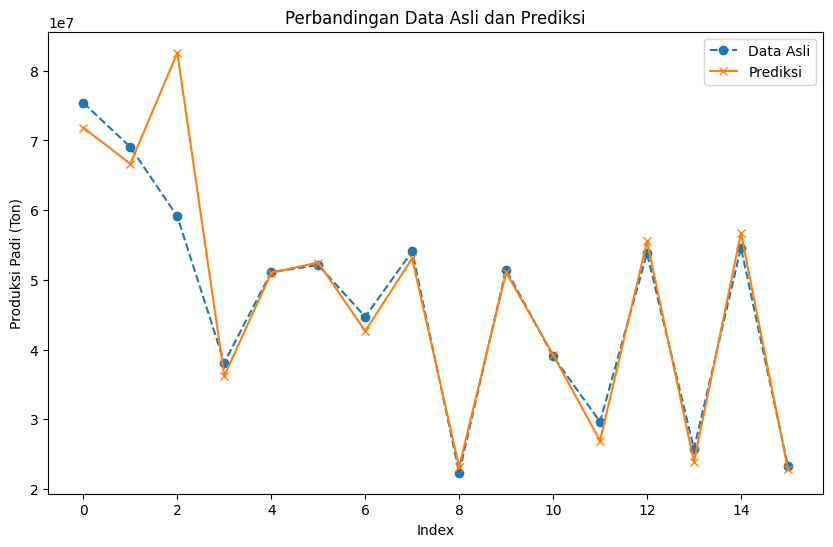

In [21]:
import matplotlib.pyplot as plt

# Plot hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Data Asli", marker='o', linestyle='--')
plt.plot(y_pred, label="Prediksi", marker='x')
plt.title("Perbandingan Data Asli dan Prediksi")
plt.xlabel("Index")
plt.ylabel("Produksi Padi (Ton)")
plt.legend()
plt.show()


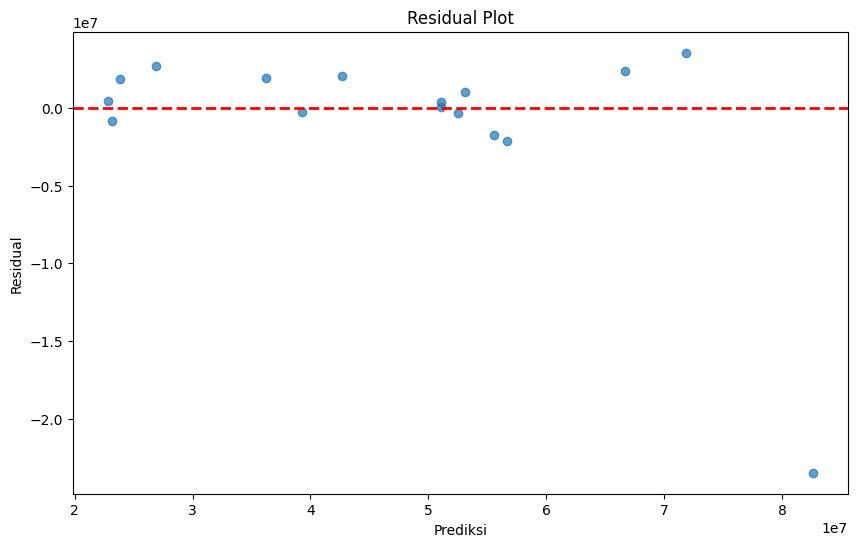

In [22]:
# Hitung residual
residuals = y_test - y_pred

# Plot residual
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Squared Error (MSE): 37419072103668.56
Root Mean Squared Error (RMSE): 6117113.0530396905
Mean Absolute Percentage Error (MAPE): 0.05672749672732637


In [26]:
# Menyiapkan data untuk tahun 2023 dan 2024
# Menggunakan nilai dari 2022 untuk prediksi 2023 dan 2024
last_year_data = data[['Produksi Padi(Ton)', 'Produksi_Padi_Lag1', 'Produksi_Padi_Lag2']].iloc[-1]
produksi_padi_2023 = model.predict([last_year_data[['Produksi_Padi_Lag1', 'Produksi_Padi_Lag2']].values])[0]

# Menggunakan hasil prediksi untuk tahun 2023 untuk prediksi tahun 2024
produksi_padi_2024 = model.predict([[produksi_padi_2023, last_year_data['Produksi_Padi_Lag1']]])[0]

print(f"Prediksi Produksi Padi Tahun 2023: {produksi_padi_2023}")
print(f"Prediksi Produksi Padi Tahun 2024: {produksi_padi_2024}")


Prediksi Produksi Padi Tahun 2023: 54546008.00658839
Prediksi Produksi Padi Tahun 2024: 55537262.81283799


C:\Users\erlan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\erlan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


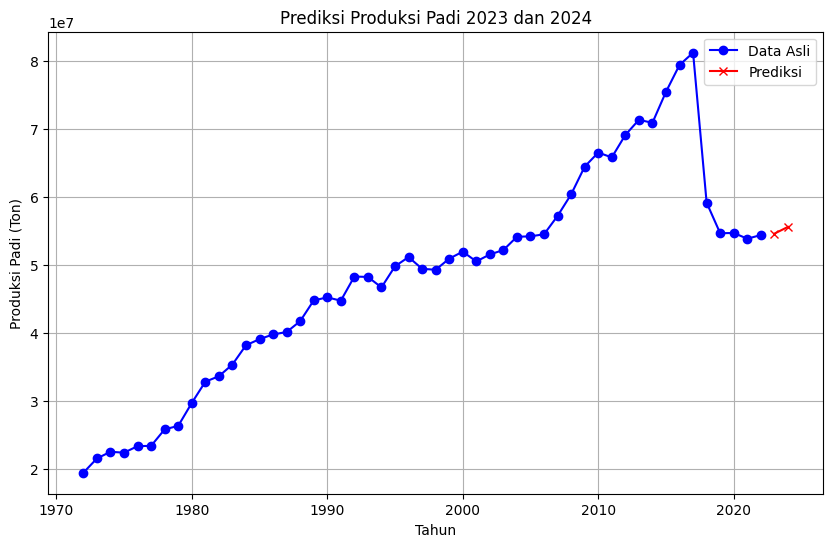

In [27]:
import matplotlib.pyplot as plt

# Menambahkan data prediksi untuk tahun 2023 dan 2024 ke dalam dataset
predictions = pd.DataFrame({
    'Tahun': [2023, 2024],
    'Prediksi Produksi Padi(Ton)': [produksi_padi_2023, produksi_padi_2024]
})

# Menggabungkan data asli dengan prediksi
data_prediksi = pd.concat([data[['Tahun', 'Produksi Padi(Ton)']], predictions], ignore_index=True)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data_prediksi['Tahun'], data_prediksi['Produksi Padi(Ton)'], label='Data Asli', color='blue', marker='o')
plt.plot(predictions['Tahun'], predictions['Prediksi Produksi Padi(Ton)'], label='Prediksi', color='red', marker='x')

# Menambahkan judul dan label
plt.title('Prediksi Produksi Padi 2023 dan 2024')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.legend()

# Menampilkan grafik
plt.grid(True)
plt.show()
